In [1]:
import tensorflow as tf 

fashion_mist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)


4422102/4422102 [==============================] - 49s 11us/step
(60000, 28, 28)


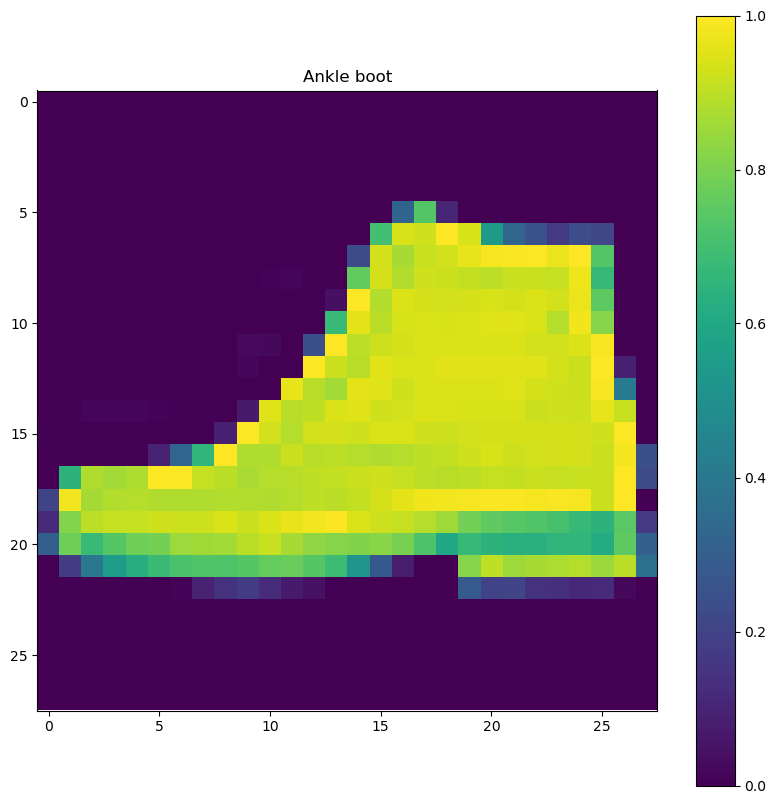

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

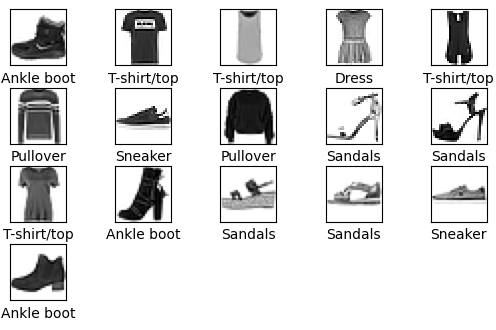

In [5]:
for i in range(16):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print ( X_train.shape, X_test.shape)

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import datasets, layers, models, losses 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3),activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#output layer with softmax activation function 

model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss= losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model.summary()